In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [347]:
majors = pd.read_csv('college_majors1.csv')
majors.drop(columns=['Unnamed: 0'], inplace=True)
majors.head()

,Major,Major_category,Grad_total,Grad_unemployment_rate,Grad_median,Nongrad_unemployment_rate,Grad_share,Grad_premium,ShareWomen,Unemployment_rate,Median,College_jobs
0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,0.087543,75000.0,0.050661,0.096320,0.153846,0.090713,0.060023,50000,3275
1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,0.057756,60000.0,0.068386,0.104420,0.250000,0.690365,0.096798,35000,37389
2,HOSPITALITY MANAGEMENT,Business,24417,0.073867,65000.0,0.048423,0.119837,0.300000,0.651660,0.061169,33000,2325
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,0.080901,47000.0,0.052900,0.125878,0.129808,0.584776,0.055677,29000,563
4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,0.058411,57000.0,0.072800,0.144753,0.096154,0.366177,0.119511,35000,4545


In [348]:
X = pd.read_csv('X_majors.csv')
y = pd.read_csv('y_majors.csv', header=None)

X.drop(columns=['Unnamed: 0'], inplace=True) # drop 0 col
y.drop(columns=[0], inplace=True) # drop 0 col
y.rename(columns={1:'Grad_median'}, inplace=True) # rename
y.drop([0], inplace=True)
y.head()

,Grad_median
1,0.3181818181818181
2,0.1477272727272727
3,0.20454545454545459
4,0.0
5,0.11363636363636365


In [349]:
print(X.shape, y.shape)

(172, 25) (172, 1)


In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [351]:
### LINEAR REGRESSION ###
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_test, y_test) # R^2

0.7902847984975703

In [352]:
pred = linreg.predict(X_test)
pred = [item for sublist in pred for item in sublist] # list of floats

In [353]:
y_test = list(y_test['Grad_median'])
y_test = [float(item) for item in y_test] # list of floats

Text(0, 0.5, 'Predicted')

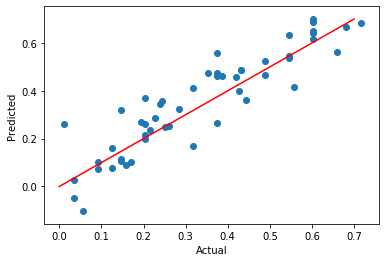

In [354]:
# Plot Performance of Predictions
x = np.linspace(0, 0.7)
y = x
plt.plot(x, y, 'r')

plt.scatter(y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [355]:
import statsmodels.api as sm
y_train['Grad_median'] = y_train['Grad_median'].astype('float')
model = sm.OLS(y_train.values.reshape(-1,1),X_train)
model.fit()

In [356]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     23.80
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.21e-30
Time:                        22:51:07   Log-Likelihood:                 144.19
No. Observations:                 120   AIC:                            -238.4
Df Residuals:                      95   BIC:                            -168.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Grad_total                                             0.1204      0.086      1.407      0.163      -0.049       0.290
Grad_unemployment_rate                                 0.1046      0.066      1.580      0.117      -0.027       0.236
Nongrad_unemployment_rate                             -0.3075      0.091     -3.395      0.001      -0.487      -0.128
Grad_share                                             0.1898      0.056      3.419      0.001       0.080       0.300
Grad_premium                                           0.7418      0.081      9.151      0.000       0.581       0.903
ShareWomen                                            -0.2867      0.057     -5.037      0.000      -0.400      -0.174
Unemployment_rate                                      0.0588      0.053      1.118      0.266      -0.046       0.163
Median                                                 0.7308      0.102      7.198      0.000       0.529       0.932
College_jobs                                          -0.0372      0.111     -0.335      0.738      -0.257       0.183
Major_category_Agriculture & Natural Resources         0.1284      0.056      2.303      0.023       0.018       0.239
Major_category_Arts                                    0.1188      0.077      1.553      0.124      -0.033       0.271
Major_category_Biology & Life Science                  0.1356      0.068      1.985      0.050   -2.93e-05       0.271
Major_category_Business                                0.2268      0.072      3.154      0.002       0.084       0.370
Major_category_Communications & Journalism             0.1924      0.087      2.199      0.030       0.019       0.366
Major_category_Computers & Mathematics                 0.2399      0.070      3.437      0.001       0.101       0.379
Major_category_Education                               0.0147      0.071      0.207      0.837      -0.126       0.155
Major_category_Engineering                             0.2055      0.072      2.835      0.006       0.062       0.349
Major_category_Health                                  0.2682      0.072      3.721      0.000       0.125       0.411
Major_category_Humanities & Liberal Arts               0.1543      0.076      2.039      0.044       0.004       0.305
Major_category_Industrial Arts & Consumer Services     0.0966      0.067      1.437      0.154      -0.037       0.230
Major_category_Interdisciplinary                       0.1529      0.107      1.430      0.156      -0.059       0.365
Major_category_Law & Public Policy                     0.1192      0.076      1.574      0.119      -0.031       0.270
Major_category_Physical Sciences                       0.2220      0.067      3.308      0.001       0.089  

In [357]:
### RANDOM FOREST ###
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train) 

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=0)

In [358]:
print('Score: ', reg.score(X_test, y_test)) # R^2

Score:  0.8126443247323154


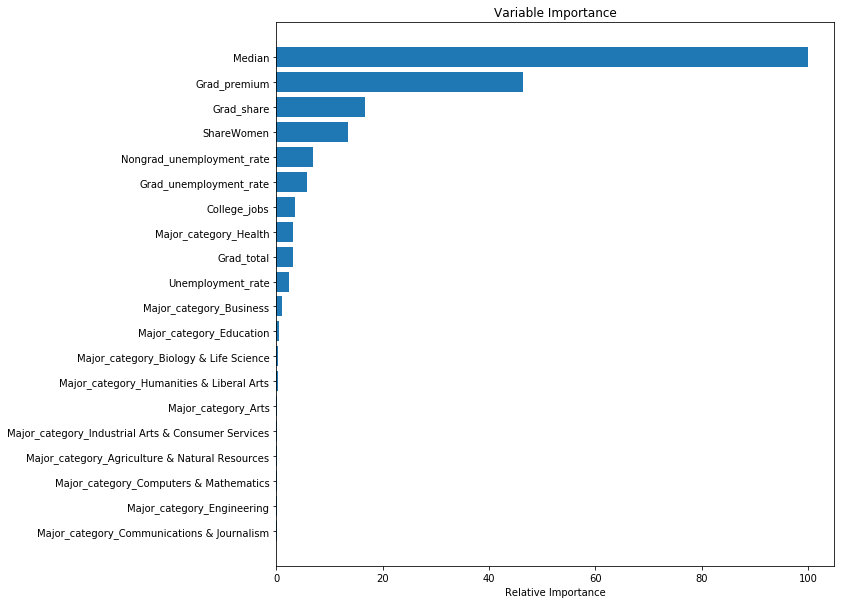

In [359]:
feature_importance = reg.feature_importances_
# importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:20]
sorted_idx = np.argsort(feature_importance)[:20]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size

plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [360]:
y_test = pd.DataFrame(y_test) # revert back to df

In [361]:
### PCR ###
pca = PCA()
X_tr = pca.fit(X_train)
X_tr = pca.transform(X_train)
X_te = pca.transform(X_test)

y_tr = pca.fit(y_train.values.reshape(-1, 1))
y_tr = pca.transform(y_train)
y_te = pca.transform(y_test.values.reshape(-1, 1))

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Grad_median
Feature names seen at fit time, yet now missing:
- College_jobs
- Grad_premium
- Grad_share
- Grad_total
- Grad_unemployment_rate
- ...

  warnings.warn(message, FutureWarning)
/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [362]:
reg = LinearRegression()
reg.fit(X_tr, y_tr)
reg.score(X_te, y_te) # R^2

0.79028479849757

In [363]:
y_pred = reg.predict(X_te)

Text(0, 0.5, 'Predicted')

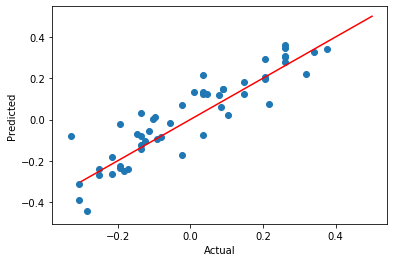

In [364]:
# Plot Performance of Predictions
x = np.linspace(-0.3, 0.5)
y = x
plt.plot(x, y, 'r')

plt.scatter(y_te, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')